# **Titanic Data Exploration and Preparation**
**Author:** Joanna Farris  
**Date:** October 29, 2025  
**Objective:** Analyze and prepare the Titanic dataset for machine learning.

## **Introduction**

This project uses the Titanic dataset to explore how passenger characteristics relate to survival outcomes. 

The analysis covers data inspection, visualization, cleaning, and feature engineering, followed by a comparison of basic and stratified train/test splits. 

Key steps include handling missing values, creating a new family_size feature, encoding categorical variables, and examining how class balance affects data preparation for modeling.

## **Section 1. Import and Inspect the Data**

In [166]:
# Standard third-party libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specific imports from libraries
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


In [167]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [168]:


pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 200)         # set display width (default is 80)


Display basic information about the dataset using the info() method.

In [169]:
print(titanic.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


Check for missing values using the isnull() method and then the sum() method.

In [170]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Display summary statistics using the describe() method

In [171]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Check for correlations using the corr() method and tell it to use only the numeric features.

In [172]:
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  adult_male     alone
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   -0.557080 -0.203367
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500    0.094035  0.135207
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067    0.280328  0.198270
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   -0.253586 -0.584471
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   -0.349943 -0.583398
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   -0.182024 -0.271832
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024    1.000000  0.404744
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832    0.404744  1.000000


Pull the strongest relationships (sorted by absolute correlation value, with duplicates dropped). 

In [173]:
corr_matrix = titanic.corr(numeric_only=True)

# Flatten the matrix into pairs
corr_pairs = corr_matrix.unstack()

# Remove self-correlations (value = 1)
corr_pairs = corr_pairs[corr_pairs < 1]

# Sort by absolute correlation strength and drop duplicate
strongest = corr_pairs.drop_duplicates().abs().sort_values(ascending=False)


print(strongest.head(5))


sibsp     alone         0.584471
parch     alone         0.583398
survived  adult_male    0.557080
pclass    fare          0.549500
sibsp     parch         0.414838
dtype: float64


## **Section 2. Data Exploration and Preparation** 

#### **2.1 Explore Data Patterns and Distributions**

Scatter matrix of 'age', 'fare', and 'pclass' with pink scatter plots and yellow histograms to visualize relationships among Titanic’s key numeric features.

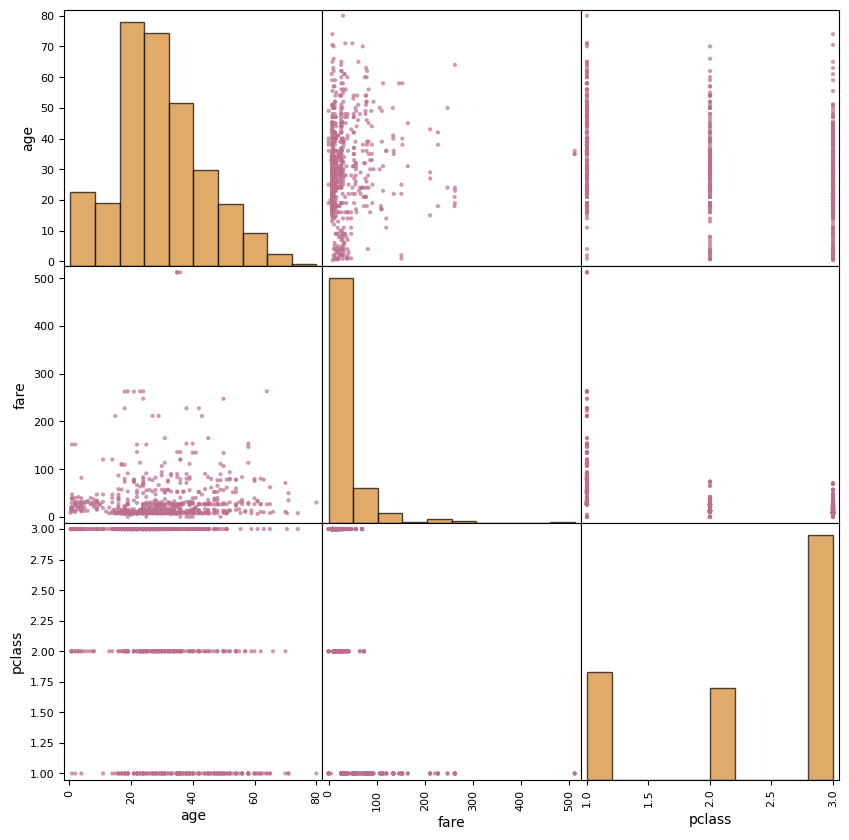

In [174]:
attributes = ['age', 'fare', 'pclass']

# Make the scatter plots
axes = scatter_matrix(
    titanic[attributes],
    figsize=(10, 10),
    color='#bb6e8d',  # scatter color
    alpha=0.7
)

# Loop through the diagonal subplots and recolor the histograms
n = len(attributes)
for i in range(n):
    ax = axes[i, i]  # diagonal subplot
    for patch in ax.patches:  # recolor each bar in the histogram
        patch.set_facecolor('#d48828')
        patch.set_edgecolor('black')
        patch.set_alpha(0.7)

plt.show()

Scatter plot of age versus fare, with points colored by gender to highlight differences in ticket prices across male and female passengers.

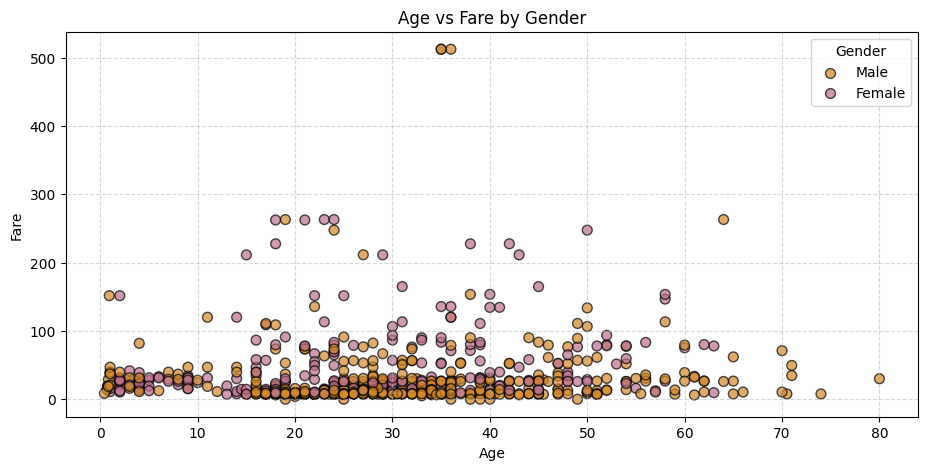

In [175]:
import matplotlib.pyplot as plt

# Make chart wider
plt.figure(figsize=(11, 5))

# Map gender to color manually
colors = titanic['sex'].map({'male': "#d48828", 'female': "#bb6e8d"})
##d9a296

# Scatter plot
plt.scatter(
    titanic['age'],
    titanic['fare'],
    c=colors,
    alpha=0.7,
    s=50, 
    edgecolors='k'
)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.grid(True, linestyle='--', alpha=0.5)

# Add a simple legend
for gender, color in {'Male': '#d48828', 'Female': "#bb6e8d"}.items():
    plt.scatter([], [], c=color, alpha=0.7, s=50, label=gender, edgecolors='k')
plt.legend(title='Gender')

plt.show()


Distribution of passenger ages with a smoothed density curve to show overall age trends on the Titanic.

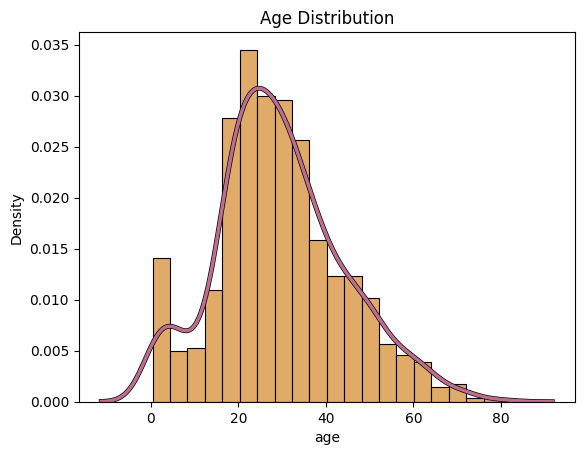

In [176]:
sns.histplot(
    titanic['age'].dropna(),
    stat='density',
    color='#d48828',
    alpha=.7,
    edgecolor='black',
    linewidth=0.8
)

# first pass = black outline, slightly thicker
sns.kdeplot(
    titanic['age'].dropna(),
    color='black',
    lw=3.5
)
# second pass = your pink line on top
sns.kdeplot(
    titanic['age'].dropna(),
    color='#bb6e8d',
    lw=2.5
)

plt.title('Age Distribution')
plt.show()


Passenger class distribution by survival status, with pink representing passengers who did not survive and yellow representing those who did.

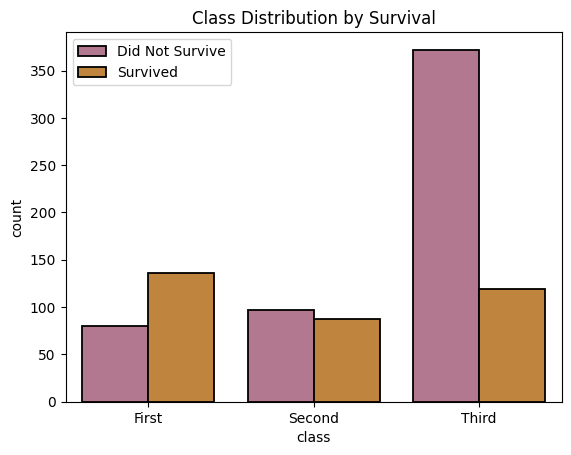

In [177]:
sns.countplot(
    x='class',
    hue='survived',
    data=titanic,
    palette={0: '#bb6e8d', 1: '#d48828'},  # pink for non-survivors, yellow for survivors
    linewidth=1.3,
    edgecolor='black'
)

plt.title('Class Distribution by Survival')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

#### **2.2 Handle Missing Values and Clean Data**

Missing values in the Age column were replaced with the median age to preserve data consistency without being influenced by outliers.

In [178]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())


Missing values in the Embark_town column were filled with the mode (most frequent value) to maintain categorical completeness.

In [179]:
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])


#### **2.3 Feature Engineering**

A new feature called Family Size was created by combining the number of siblings/spouses (sibsp) and parents/children (parch) aboard, plus one to include the passenger themselves.

In [180]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


Categorical features for gender and embarkation port were converted into numeric form to prepare the data for machine learning models.

In [181]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
#print(titanic.head(10))

## **Section 3. Feature Selection and Justification**  

#### **3.1 Choose features and target** 

For this classification task, the goal is to predict passenger survival on the Titanic. The **target variable** is survived, a binary feature indicating whether each passenger lived (1) or did not (0). The **input features** include `age`, `fare`, `pclass`, `sex`, and `family_size` — chosen to capture key demographic and socioeconomic factors that likely influenced survival outcomes.

#### **3.2 Define X and y** 

We assign the selected input features to **X** and the target variable to **y**, preparing the data for model training.

In [188]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']] # noqa: N816
y = titanic['survived']

## **Section 4. Splitting** 

#### **4.1 Basic Train/Test Split**

First, we use `train_test_split` to divide the data into training and testing sets.

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

# save survival ratios (not printing yet)
orig_ratio = y.value_counts(normalize=True).sort_index()
basic_train_ratio = y_train_basic.value_counts(normalize=True).sort_index()
basic_test_ratio = y_test_basic.value_counts(normalize=True).sort_index()

Train size: 712
Test size: 179


#### **4.2 Stratified Train/Test split**  

Next, we use `StratifiedShuffleSplit` to divide the data while preserving the same class proportions (e.g., survival rate) in both subsets, ensuring balanced representation of each class.


In [184]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

strat_train_ratio = y_train_strat.value_counts(normalize=True).sort_index()
strat_test_ratio = y_test_strat.value_counts(normalize=True).sort_index()

Train size: 712
Test size: 179


#### **4.3 Compare Survival Ratios** 

**Original Distribution:** We begin by checking the *overall survival ratio* in the dataset.

In [185]:
print()
print("Original Survival Ratio:\n", orig_ratio)
print()


Original Survival Ratio:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64




**Basic Split:** Next, we look at the *survival ratios* in the training and test sets produced by the *basic random split*.

In [186]:
print()
print("BASIC SPLIT:")
print()
print("Train Survival Ratio:\n", basic_train_ratio)
print()
print("Test Survival Ratio:\n", basic_test_ratio)
print()



BASIC SPLIT:

Train Survival Ratio:
 survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64

Test Survival Ratio:
 survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64



Print)
**Stratified Split:** Finally, we check the same *ratios for the stratified split*, which is expected to preserve the original class balance more closely.

In [187]:
print()
print("STRATIFIED SPLIT:")
print()
print("Train Survival Ratio:\n", strat_train_ratio)
print()
print("Test Survival Ratio:\n", strat_test_ratio)
print()



STRATIFIED SPLIT:

Train Survival Ratio:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Test Survival Ratio:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64



**Note:** The stratified split preserved the original survival ratio (≈61.6% non-survivors, 38.4% survivors) in both training and test sets, while the basic split showed minor deviation — with the training set at ≈61.1% non-survivors and 38.9% survivors, and the test set at ≈63.7% non-survivors and 36.3% survivors.